In [1]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats as stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.optimize
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts


sns.set(palette="icefire")


# Cena Bitcoina w USD

In [2]:
df=pd.read_csv('dc.csv')
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df=df.drop(['open_SAR','high_SAR','low_SAR','close_SAR','volume', 'high_USD','low_USD', 'close_USD'], axis=1)
df.rename(columns={'open_USD':'Open'}, inplace=True)
df

,Date,Open
0,2021-01-30,34246.28
1,2021-01-29,33368.18
2,2021-01-28,30362.19
3,2021-01-27,32464.01
4,2021-01-26,32254.19
...,...,...
995,2018-05-11,9002.21
996,2018-05-10,9310.00
997,2018-05-09,9178.00
998,2018-05-08,9365.00


In [3]:
date=df['Date']
open=np.array(df['Open'])

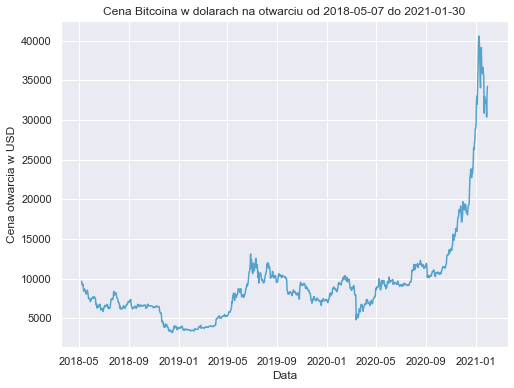

In [4]:
plt.figure(figsize=(8,6))
plt.plot(date, open)
plt.title('Cena Bitcoina w dolarach na otwarciu od 2018-05-07 do 2021-01-30')
plt.xlabel('Data')
plt.ylabel('Cena otwarcia w USD')
plt.savefig('cena_bitcoina.png')
plt.show()

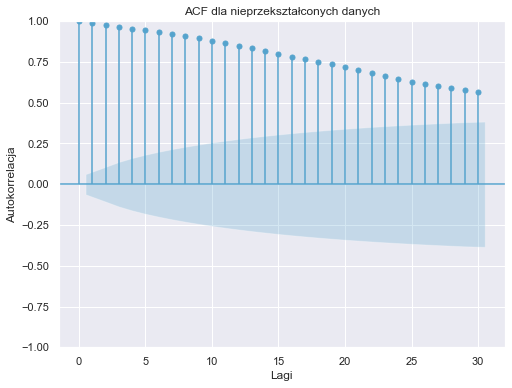

In [5]:
fig,ax=plt.subplots(figsize=(8,6))
plot_acf(open, lags=30, ax=ax, title='ACF dla nieprzekształconych danych')
plt.xlabel('Lagi')
plt.ylabel('Autokorrelacja')
plt.savefig('acf_nieprzekształcone.png')
plt.show()

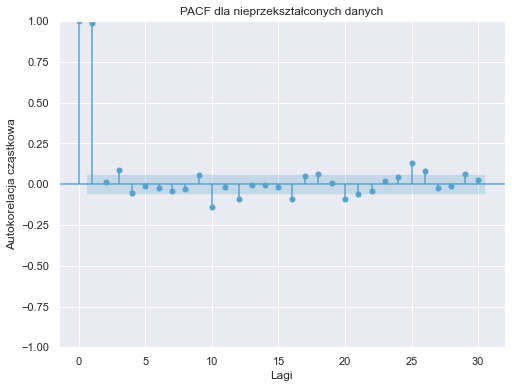

In [6]:
fig,ax=plt.subplots(figsize=(8,6))
plot_pacf(open,lags=30,ax=ax, title='PACF dla nieprzekształconych danych')
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja cząstkowa')
plt.savefig('pacf_nieprzekształcone.png')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(open)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)


ADF Statistic: -7.00101222860436
p-value: 7.322041200413897e-10
Critical Values:
1% : -3.4370334797663844
5% : -2.8644907213150725
10% : -2.568341114581742


In [8]:
open_boxcox=stats.boxcox(open, lmbda=0)

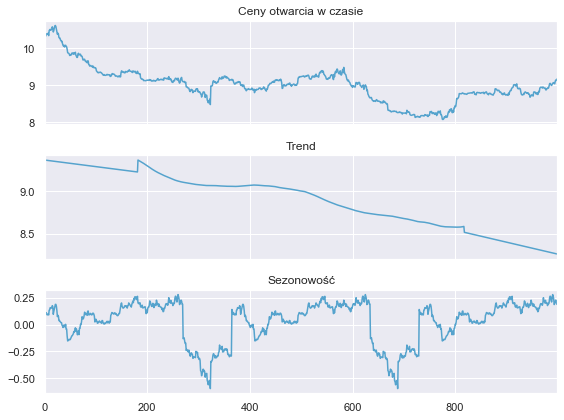

In [9]:
decomposition=seasonal_decompose(open_boxcox, model='additive', period=365, extrapolate_trend='freq')
fig=decomposition.plot(resid=False)
fig.axes[0].set_title('Ceny otwarcia w czasie')
fig.axes[1].set_title('Trend')
fig.axes[2].set_title('Sezonowość')
fig.axes[1].set_ylabel('')
fig.axes[2].set_ylabel('')
fig.set_size_inches((8, 6))
fig.tight_layout()
plt.savefig('dekompozycja.png')

In [10]:
trend=decomposition.trend
seasonal=decomposition.seasonal

In [11]:
t=np.arange(0,len(open),1)

In [12]:
X_t_minus_all=open-seasonal-trend

In [26]:
# Wykonaj różnicowe X_t_minus_all z krokiem 1
X_t_minus_all_diff = np.diff(X_t_minus_all, 5)

In [27]:
X_t_minus_all_diff

array([ 7.10280994e+16, -6.90929217e+16,  7.16721649e+16, -8.19376195e+16,
        1.01175114e+17, -1.27937230e+17,  1.58374569e+17, -1.87530216e+17,
        2.10858091e+17, -2.25224541e+17,  2.29114315e+17, -2.22313473e+17,
        2.05586816e+17, -1.80668392e+17,  1.50440934e+17, -1.18867878e+17,
        9.03231760e+16, -6.83903217e+16,  5.46492442e+16, -4.80937787e+16,
        4.55257876e+16, -4.27660987e+16,  3.61432408e+16, -2.36724118e+16,
        5.57701335e+15,  1.58670040e+16, -3.69568962e+16,  5.34001363e+16,
       -6.11866456e+16,  5.74333179e+16, -4.11710856e+16,  1.39485296e+16,
        2.00286946e+16, -5.45399743e+16,  8.28585067e+16, -9.97534915e+16,
        1.03202462e+17, -9.49988297e+16,  7.99005340e+16, -6.36850201e+16,
        5.10154559e+16, -4.40553763e+16,  4.23067929e+16, -4.35089312e+16,
        4.49962309e+16, -4.48588030e+16,  4.25035219e+16, -3.85683313e+16,
        3.44083507e+16, -3.14668643e+16,  3.07796440e+16, -3.27073536e+16,
        3.68464137e+16, -

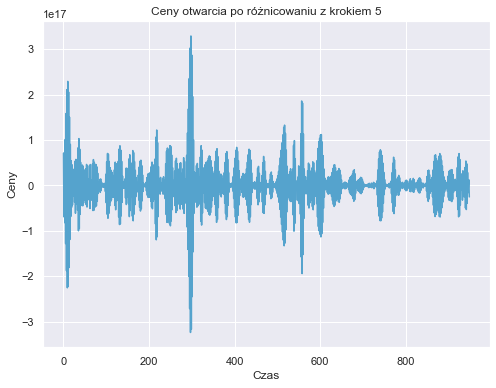

In [28]:
plt.figure(figsize=(8,6))
plt.plot(X_t_minus_all_diff)
plt.xlabel('Czas')
plt.ylabel('Ceny')
plt.title('Ceny otwarcia po różnicowaniu z krokiem 5')
plt.savefig('ceny_po_różnicowaniu.png')
plt.show()

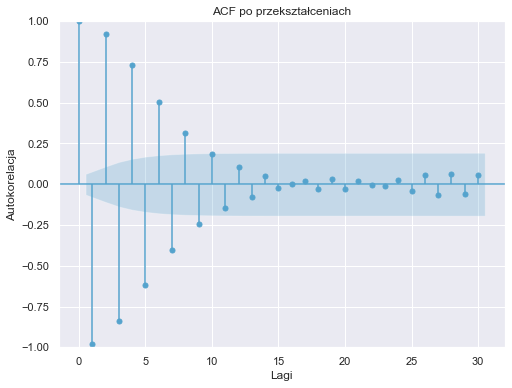

In [29]:
fig,ax=plt.subplots(figsize=(8,6))
plot_acf(X_t_minus_all_diff,lags=30,ax=ax, title='ACF po przekształceniach')
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja')
plt.savefig('acf_po_przekształceniach.png')
plt.show()

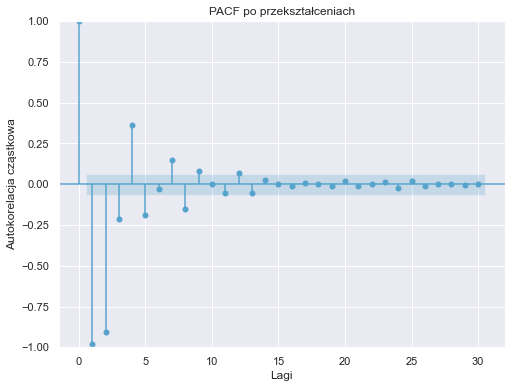

In [30]:
fig,ax=plt.subplots(figsize=(8,6))
plot_pacf(X_t_minus_all_diff,lags=30,ax=ax, title='PACF po przekształceniach')
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja cząstkowa')
plt.savefig('pacf_po_przekształceniach.png')
plt.show()

In [31]:
# create pandas df of X_t_minus_all_diff
df_diff = pd.DataFrame(X_t_minus_all_diff, columns=["Open"])
df_diff

,Open
0,7.102810e+16
1,-6.909292e+16
2,7.167216e+16
3,-8.193762e+16
4,1.011751e+17
...,...
945,2.853411e+16
946,-1.574417e+16
947,1.721265e+15
948,1.245122e+16


In [34]:
result1 = adfuller(df_diff['Open'])
print('ADF Statistic:', result1[0])
print('p-value:', result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print(key, ':', value)


ADF Statistic: -18.948928986392392
p-value: 0.0
Critical Values:
1% : -3.437385839245221
5% : -2.8646461040926496
10% : -2.5684238776271435


In [20]:
aic = []
bic = []

for p in range(7):
    for q in range(7):
        try:
            model = ARIMA(df_diff['Open'], order=(p, 0, q))
            model_fit = model.fit()
            aic.append(model_fit.aic)
            bic.append(model_fit.bic)
        except:
            aic.append(np.nan)
            bic.append(np.nan)

c:\Users\jakub\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jakub\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jakub\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jakub\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jakub\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarnin

In [ ]:
aic = np.array(aic).reshape(7, 7)
bic = np.array(bic).reshape(7, 7)
aic = pd.DataFrame(aic).to_csv("aic.csv")
bic = pd.DataFrame(bic).to_csv("bic.csv")

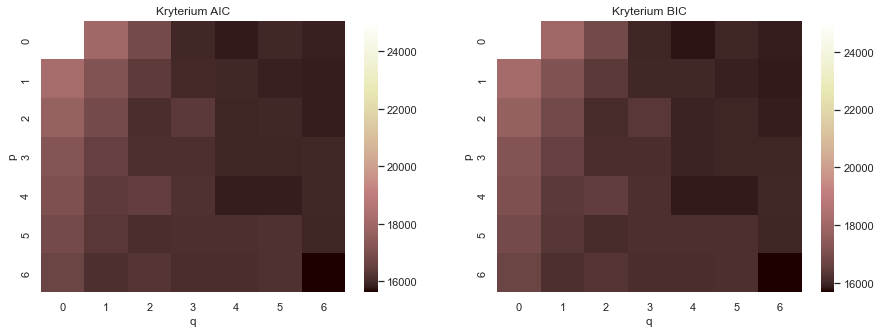

In [ ]:
aic = pd.read_csv("aic.csv", index_col=0)
bic = pd.read_csv("bic.csv", index_col=0)
aic = np.array(aic).reshape(7,7)
bic = np.array(bic).reshape(7, 7)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(aic, ax=ax[0], annot=False, cmap="pink")
sns.heatmap(bic, ax=ax[1], annot=False, cmap="pink")
ax[0].set_title("Kryterium AIC")
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[1].set_title("Kryterium BIC")
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
plt.savefig('aic_bic.png')
plt.show()

In [ ]:
p, q =  6,6

model = ARIMA(df_diff['Open'], order=(p, 0, q))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  995
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -7794.329
Date:                Mon, 05 Feb 2024   AIC                          15616.659
Time:                        23:41:35   BIC                          15685.297
Sample:                             0   HQIC                         15642.753
                                - 995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0226      0.833      1.228      0.219      -0.609       2.654
ar.L1         -1.4999      0.090    -16.730      0.000      -1.676      -1.324
ar.L2          0.0991      0.063      1.585      0.1

c:\Users\jakub\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
params = model_fit.params.drop(["const"])

sigma2 = params["sigma2"]

params = params.drop(["sigma2"])

n = len(df_diff['Open'])

In [ ]:
arma_process = ArmaProcess(np.r_[1, -params[:6]], np.r_[1, params[6:]]).generate_sample(n+1, scale=sigma2**0.5)

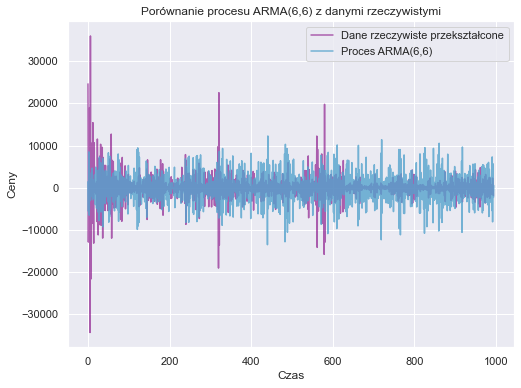

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_diff['Open'], color='purple', label='Dane rzeczywiste przekształcone', alpha=0.6)
plt.plot(arma_process, label='Proces ARMA(6,6)',alpha=0.8)
plt.xlabel('Czas')
plt.ylabel('Ceny')
plt.title('Porównanie procesu ARMA(6,6) z danymi rzeczywistymi')
plt.legend()
plt.savefig('porównanie_arma.png')
plt.show()


# Przedziały ufności

In [ ]:
def generate_arma(p, q, n):
    return ArmaProcess(np.r_[1, -params[:6]], np.r_[1, params[6:]]).generate_sample(n+1, scale=sigma2**0.5)

In [ ]:
x_t_df = pd.DataFrame([generate_arma(6, 6, n) for _ in range(100)]).T

In [ ]:
hs = np.arange(0, 30)

In [ ]:
x_t_df = pd.DataFrame([generate_arma(6, 6, n) for _ in range(100)]).T

In [ ]:
acfs_df = pd.DataFrame(index=range(len(x_t_df)), columns=hs)

In [ ]:
for index, x_t_df in x_t_df.iterrows():
    for h in hs:
        acfs_df.at[index, h] = ts.acf(x_t_df, nlags=h, fft=False)[h]

quantile_05 = [acfs_df[h].quantile(0.05) for h in hs]
quantile_95 = [acfs_df[h].quantile(0.95) for h in hs]

acfs_quantiles = pd.DataFrame({"quantile_05": quantile_05, "quantile_95": quantile_95}).to_csv("acfs_quantiles.csv")

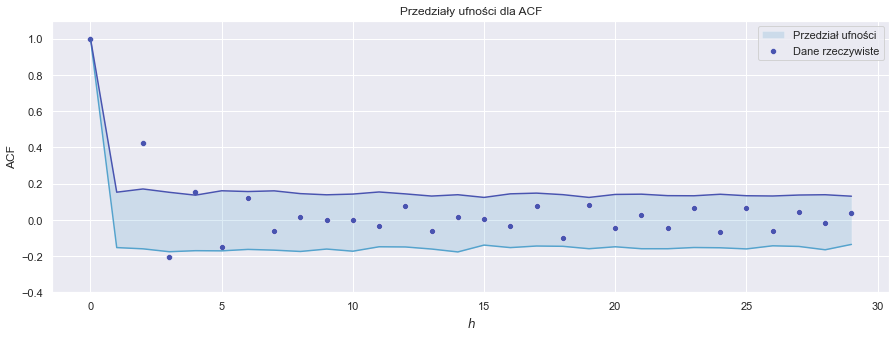

In [ ]:
hs = np.arange(0, 30)
quantiles = pd.read_csv("acfs_quantiles.csv", index_col=0)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.lineplot(x=hs, y=quantiles["quantile_05"], ax=ax)
sns.lineplot(x=hs, y=quantiles["quantile_95"], ax=ax)
ax.fill_between(hs, quantiles["quantile_05"], quantiles["quantile_95"], alpha=0.2, label="Przedział ufności")


autocov_for_data = ts.acf(df_diff['Open'].dropna(), nlags=29)
sns.scatterplot(x=hs, y=autocov_for_data, ax=ax, label="Dane rzeczywiste")
ax.set_xlabel(r"$h$")
ax.set_ylabel("ACF")
ax.set_ylim(-0.4, 1.1)
ax.set_title('Przedziały ufności dla ACF')
plt.savefig('przedziały_ufności.png')
plt.show()   

In [ ]:
pacfs_df = pd.DataFrame(index=range(len(x_t_df)), columns=hs)

In [ ]:
x_t_df = pd.DataFrame([generate_arma(6, 6, n) for _ in range(100)]).T

for index, x_t_df in x_t_df.iterrows():
    for h in hs:
        pacfs_df.at[index, h] = ts.pacf(x_t_df, nlags=h)[h]

quantile_05 = [pacfs_df[h].quantile(0.05) for h in hs]
quantile_95 = [pacfs_df[h].quantile(0.95) for h in hs]

pacf_quantiles = pd.DataFrame({"quantile_05": quantile_05, "quantile_95": quantile_95}).to_csv("pacf_quantiles.csv")

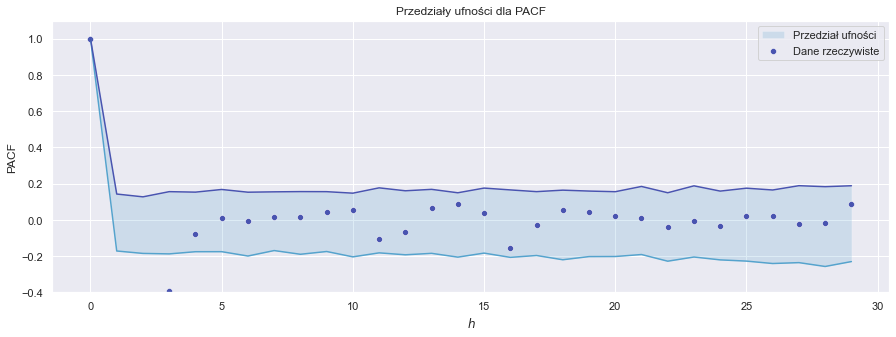

In [ ]:
pacf_quantiles = pd.read_csv("pacf_quantiles.csv", index_col=0)
hs = np.arange(0, 30)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.lineplot(x=hs, y=pacf_quantiles["quantile_05"], ax=ax)
sns.lineplot(x=hs, y=pacf_quantiles["quantile_95"], ax=ax)

ax.fill_between(hs, pacf_quantiles["quantile_05"], pacf_quantiles["quantile_95"], alpha=0.2, label="Przedział ufności")

autocov_for_data = ts.pacf(df_diff['Open'].dropna(), nlags=29)

sns.scatterplot(x=hs, y=autocov_for_data, ax=ax, label="Dane rzeczywiste")
    
ax.set_xlabel(r"$h$")
ax.set_ylabel("PACF")
ax.set_ylim(-0.4, 1.1)
ax.set_title('Przedziały ufności dla PACF')
plt.savefig('przedziały_ufności_pacf.png')
plt.show()

In [ ]:
Residua=model_fit.resid

In [ ]:
Residua=np.array(Residua)
Residua

array([ 2.46000775e+04,  6.99418009e+03,  2.99197659e+03, -2.81614020e+03,
        9.10379433e+03, -7.54055987e+03, -1.99426438e+03, -1.58077767e+03,
        8.84334588e+02,  1.99783568e+03,  2.31185366e+03, -4.15873117e+03,
       -2.52842306e+03,  5.11927216e+03,  2.96441486e+03, -3.53070875e+02,
       -2.64350831e+03, -3.94016515e+03, -3.07775484e+03, -2.71133716e+02,
        2.20823251e+03,  5.00584850e+03,  9.75908131e+01, -2.13003333e+03,
        1.83873479e+03,  6.43816021e+02, -1.40739668e+03,  6.21815524e+02,
       -8.72110499e+02,  2.50202917e+02, -2.21543193e+03, -5.00645228e+02,
        1.79752111e+02,  8.78690415e+02, -1.35732649e+03,  9.58690403e+02,
       -2.01144447e+02, -1.54382883e+03, -2.43767858e+02, -1.44012381e+03,
       -8.85473900e+02,  1.89216961e+03,  1.34704388e+03,  8.58570095e+02,
        3.96503528e+02,  1.36104455e+03,  9.63759258e+02,  1.30698350e+02,
        1.26019918e+03, -1.76303225e+02, -6.20505781e+02, -6.57852091e+02,
        7.26909791e+02, -

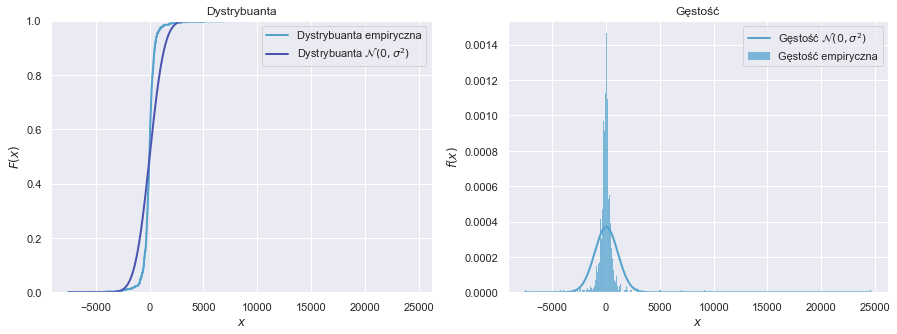

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

xs = np.linspace(np.min(model_fit.resid), np.max(model_fit.resid), 1000)

sns.ecdfplot(model_fit.resid, ax=ax[0], label="Dystrybuanta empiryczna", linewidth=2)
sns.lineplot(x=xs, y=stats.norm.cdf(xs, loc=np.mean(model_fit.resid), scale=np.std(model_fit.resid)), ax=ax[0], label="Dystrybuanta $\mathcal{N}(0,\sigma^2)$", linewidth=2)

sns.histplot(model_fit.resid, stat="density", ax=ax[1], label="Gęstość empiryczna", edgecolor="None")
sns.lineplot(x=xs, y=stats.norm.pdf(xs, loc=np.mean(model_fit.resid), scale=np.std(model_fit.resid)), ax=ax[1], label="Gęstość $\mathcal{N}(0,\sigma^2)$", linewidth=2)

#ax[0].legend(loc="lower right")

ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$F(x)$")
ax[0].set_title("Dystrybuanta")
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$f(x)$")
ax[1].set_title("Gęstość")
plt.savefig('dystrybuanta_gęstość.png')
plt.show()

In [ ]:
kurtosis_resid = stats.kurtosis(Residua, fisher=True)
kurtosis_resid

278.3941399388883

In [ ]:
skewness = stats.skew(Residua)
skewness

12.464464234815113

In [ ]:
s = np.std(Residua)
x1 = 3 * s
cdf_value = stats.norm.cdf(x1, 0, 1.6559)
cdf_value

1.0

In [ ]:
s = np.std(Residua)
x2 = -3 * s
cdf_value2 = stats.norm.cdf(x2, 0, 1.6559)
cdf_value2

0.0

In [ ]:
cdf_value-cdf_value2

1.0

In [ ]:
from scipy.stats import kstest

# Przeprowadzenie testu KS
ks_statistic, p_value = kstest(Residua, 'norm', args=(0, 1.6559))

# Wyświetlenie wyników
print("Statystyka KS:", ks_statistic)
print("Wartość p:", p_value)


Statystyka KS: 0.5131898893857215
Wartość p: 9.037386729735109e-244


In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on residuals
shapiro_statistic, p_value = shapiro(Residua)

# Display the results
print("Shapiro-Wilk statistic:", shapiro_statistic)
print("P-value:", p_value)


Shapiro-Wilk statistic: 0.3988208770751953
P-value: 0.0


In [ ]:
np.mean(Residua)

12.861570268410393

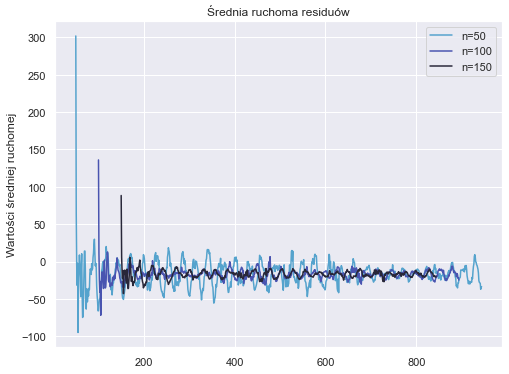

In [ ]:
def srednia_kroczaca(x, p):
    return [np.mean(x[i - p : i + p + 1]) for i in range(p, len(x) - p)]

# Okresy średniej kroczącej
okresy = [50,100,150]

# Wygeneruj wykresy
plt.figure(figsize=(8,6))
for okres in okresy:
    wynik = srednia_kroczaca(Residua, okres)
    plt.plot(range(okres, len(Residua)-okres), wynik, label=f'n={okres}')

# Dodaj legende, tytuł i etykiety osi
plt.legend()
plt.title('Średnia ruchoma residuów')
plt.ylabel('Wartości średniej ruchomej')

# Wyświetl wykres
plt.savefig('moving_average.png')
plt.show()



In [ ]:
from scipy.stats import ttest_1samp

# Define the null hypothesis value
null_value = 0

# Specify the sample data
sample_data = Residua

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(sample_data, 0)

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.3755157081401573
P-value: 0.707357084409614


# Wariancja

In [ ]:
median = np.median(model_fit.resid)
quantile_25 = np.quantile(model_fit.resid, 0.25)
quantile_75 = np.quantile(model_fit.resid, 0.75)

group1 = model_fit.resid[model_fit.resid < quantile_25]
group2 = model_fit.resid[(model_fit.resid >= quantile_25) & (model_fit.resid < median)]
group3 = model_fit.resid[(model_fit.resid >= median) & (model_fit.resid < quantile_75)]
group4 = model_fit.resid[model_fit.resid >= quantile_75]

test_statistic, p_value = stats.levene(group1, group2, group3, group4, center="median")

pd.DataFrame({"Statystyka testowa": [test_statistic], "p-wartość": [p_value]}).set_index(pd.Index(["wartość"]))

,Statystyka testowa,p-wartość
wartość,11.182248,3.208135e-07


# Niezależność

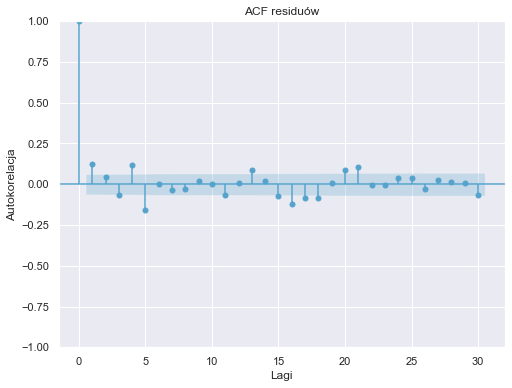

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plot_acf(Residua,lags=30,ax=ax, title='ACF residuów')
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja')
plt.savefig('acf_residua.png')
plt.show()

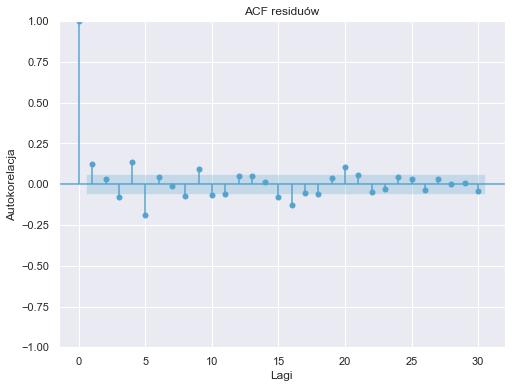

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plot_pacf(Residua,lags=30,ax=ax, title='ACF residuów')
plt.xlabel('Lagi')
plt.ylabel('Autokorelacja')
plt.savefig('pacf_residua.png')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

k=range(0,30)
# Perform the Ljung-Box test on residuals
a = acorr_ljungbox(Residua, lags=k)

a

,lb_stat,lb_pvalue
0,137.257801,NaN
1,15.935611,6.553405e-05
2,17.978939,1.247163e-04
3,22.496591,5.141412e-05
4,36.768210,2.010622e-07
5,61.266208,6.651961e-12
6,61.280268,2.471947e-11
7,62.766746,4.220725e-11
8,63.481692,9.626813e-11
9,63.797942,2.470318e-10
